In [2]:
#%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import sklearn as sk
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
import xgboost as xgb
# from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

sns.set(style='white', context='notebook', palette='deep')

In [5]:
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")

In [8]:
combine = pd.concat([train.drop('Survived',1),test])

In [9]:
train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## missing value

In [12]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [14]:
surv = train[train['Survived']==1]
nosurv = train[train['Survived']==0]
surv_col = 'blue'
nosurv_col = 'red'

print("Survived: %i (%.1f percent), Not Survived: %i (%.1f percent), Total: %i"\
      %(len(surv), 1.*len(surv)/len(train)*100.0,\
        len(nosurv), 1.*len(nosurv)/len(train)*100.0, len(train)))

Survived: 342 (38.4 percent), Not Survived: 549 (61.6 percent), Total: 891


In [16]:
%matplotlib inline

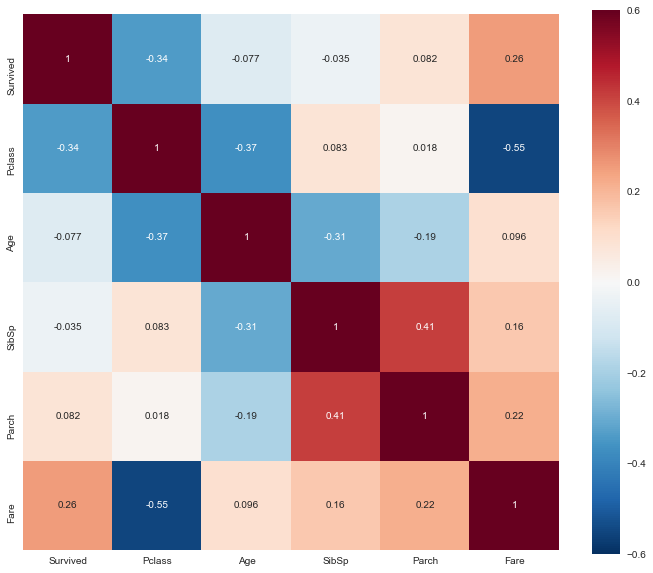

In [17]:
plt.figure(figsize=(12,10))
foo = sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

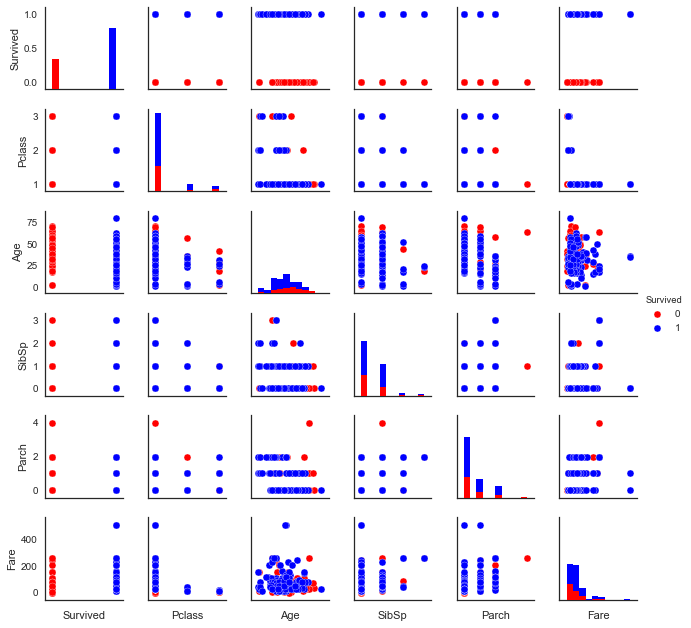

In [18]:
cols = ['Survived','Pclass','Age','SibSp','Parch','Fare']
g = sns.pairplot(data=train.dropna(),vars=cols, size=1.5,
                hue='Survived',palette=[nosurv_col,surv_col])
g.set(xticklabels=[])

Median age survivors: 28.0, Median age non-survivers: 28.0


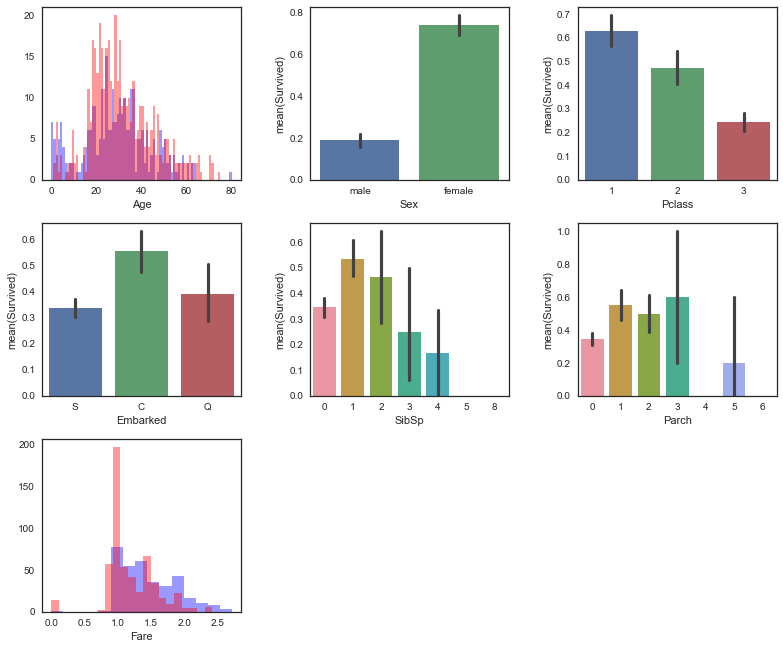

In [21]:
plt.figure(figsize=[12,10])
plt.subplot(331)
sns.distplot(surv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=surv_col)
sns.distplot(nosurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=nosurv_col,
            axlabel='Age')
plt.subplot(332)
sns.barplot('Sex', 'Survived', data=train)
plt.subplot(333)
sns.barplot('Pclass', 'Survived', data=train)
plt.subplot(334)
sns.barplot('Embarked', 'Survived', data=train)
plt.subplot(335)
sns.barplot('SibSp', 'Survived', data=train)
plt.subplot(336)
sns.barplot('Parch', 'Survived', data=train)
plt.subplot(337)
sns.distplot(np.log10(surv['Fare'].dropna().values+1), kde=False, color=surv_col)
sns.distplot(np.log10(nosurv['Fare'].dropna().values+1), kde=False, color=nosurv_col,axlabel='Fare')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

print("Median age survivors: %.1f, Median age non-survivers: %.1f"\
      %(np.median(surv['Age'].dropna()), np.median(nosurv['Age'].dropna())))

In [22]:
tab = pd.crosstab(train['SibSp'], train['Survived'])
print(tab)
#dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", 
#                         stacked=True, color=[nosurv_col,surv_col])
#dummy = plt.xlabel('SibSp')
#dummy = plt.ylabel('Percentage')

Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0


## cabin numbers

In [23]:
print("We know %i of %i Cabin numbers in the training data set and"
      %(len(train['Cabin'].dropna()), len(train)))
print("we know %i of %i Cabin numbers in the testing data set."
      %(len(test['Cabin'].dropna()), len(test)))
train.loc[:,['Survived','Cabin']].dropna().head(8)

We know 204 of 891 Cabin numbers in the training data set and
we know 91 of 418 Cabin numbers in the testing data set.


,Survived,Cabin
1,1,C85
3,1,C123
6,0,E46
10,1,G6
11,1,C103
21,1,D56
23,1,A6
27,0,C23 C25 C27


## ticket numbers

In [24]:
print("There are %i unique ticket numbers among the %i tickets." \
      %(train['Ticket'].nunique(),train['Ticket'].count()))

There are 681 unique ticket numbers among the 891 tickets.


In [25]:
grouped = train.groupby('Ticket')
k = 0
for name, group in grouped:
    if (len(grouped.get_group(name)) > 1):
        print(group.loc[:,['Survived','Name']])
        k += 1
    if (k>10):
        break

     Survived                                               Name
257         1                               Cherry, Miss. Gladys
504         1                              Maioni, Miss. Roberta
759         1  Rothes, the Countess. of (Lucy Noel Martha Dye...
     Survived                                    Name
262         0                       Taussig, Mr. Emil
558         1  Taussig, Mrs. Emil (Tillie Mandelbaum)
585         1                     Taussig, Miss. Ruth
     Survived                            Name
110         0  Porter, Mr. Walter Chamberlain
475         0     Clifford, Mr. George Quincy
     Survived                                             Name
329         1                     Hippach, Miss. Jean Gertrude
523         1  Hippach, Mrs. Louis Albert (Ida Sophia Fischer)
     Survived                                    Name
166         1  Chibnall, Mrs. (Edith Martha Bowerman)
356         1             Bowerman, Miss. Elsie Edith
     Survived                      

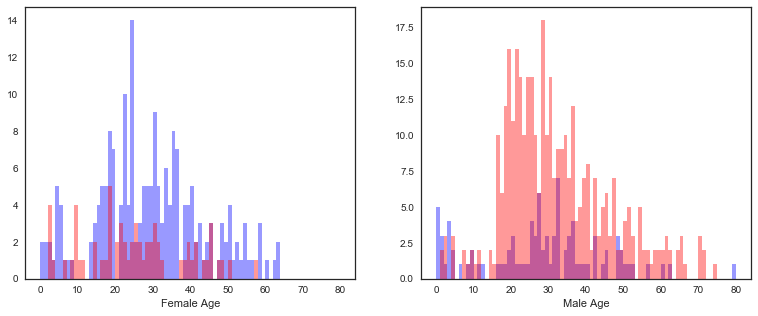

In [26]:
msurv = train[(train['Survived']==1) & (train['Sex']=="male")]
fsurv = train[(train['Survived']==1) & (train['Sex']=="female")]
mnosurv = train[(train['Survived']==0) & (train['Sex']=="male")]
fnosurv = train[(train['Survived']==0) & (train['Sex']=="female")]

plt.figure(figsize=[13,5])
plt.subplot(121)
sns.distplot(fsurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=surv_col)
sns.distplot(fnosurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=nosurv_col,
            axlabel='Female Age')
plt.subplot(122)
sns.distplot(msurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=surv_col)
sns.distplot(mnosurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=nosurv_col,
            axlabel='Male Age',label='Male')

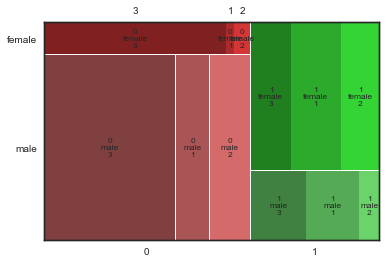

In [27]:
dummy = mosaic(train,["Survived","Sex","Pclass"])